In [34]:
import pandas as pd
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt

In [33]:
with open('./perceptron_train.dat') as f:
    data = []
    frequency = []
    frequency_dict = dict()
    for row in f:
        data.append(row.split())
    epochs = 2000
    for _ in range(epochs):
        X_train,y_train = suffle_data(data)
        frequency.append(PLA(X_train, y_train))
        
    #print(frequency)
    for i in frequency:
        frequency_dict[i] = frequency_dict.get(i, 0) + 1
    print(frequency_dict)

{54: 76, 52: 61, 37: 220, 33: 105, 56: 72, 60: 50, 39: 251, 35: 162, 26: 35, 43: 141, 20: 47, 41: 211, 28: 23, 22: 74, 48: 21, 24: 62, 45: 61, 31: 45, 58: 76, 50: 43, 18: 17, 62: 31, 30: 7, 75: 3, 29: 5, 51: 2, 11: 2, 46: 6, 16: 1, 9: 6, 64: 15, 68: 2, 73: 2, 81: 1, 47: 26, 49: 7, 27: 3, 67: 2, 53: 1, 79: 3, 32: 1, 66: 8, 44: 1, 7: 3, 77: 1, 69: 1, 70: 1, 14: 1, 72: 1, 61: 1, 13: 1, 76: 1, 83: 1}


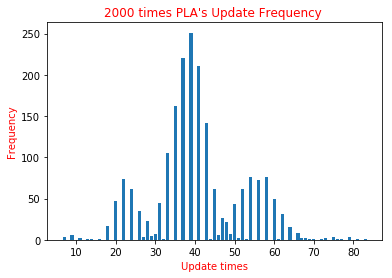

In [52]:
def plot():
    sort_frequency_dict = sorted(frequency_dict.items())
    plt.title("2000 times PLA's Update Frequency ",color='r')
    plt.xlabel('Update times',color = 'red')
    plt.ylabel('Frequency',color = 'red')
    plt.bar([sort_frequency_dict[i][0] for i in range(len(sort_frequency_dict))], [sort_frequency_dict[i][1] for i in range(len(sort_frequency_dict))])
    plt.savefig('hist.jpg') #savefig must before plt.show() , reason: https://stackoverflow.com/questions/21875356/saving-a-figure-after-invoking-pyplot-show-results-in-an-empty-file
    plt.show()
plot()


In [17]:
def suffle_data(data):
    feature = []
    label = []
    ## random sort data
    shuffle(data)
    #print(data)
    
    for i in data: 
        feature.append(i[:-1])
        label.append(i[-1:])
    X_train = np.array(feature,dtype = np.float64)
    y_train = np.array(label,dtype = np.float64)
    return X_train,y_train
    

In [28]:
def PLA(X_train, y_train):
    #initial w0 & b0
    w=np.zeros(4)
    b=np.zeros(1)
    update_times = 0
    while True:
        no_mistake = True
        for i in range(X_train.shape[0]):
            if y_train[i] * (np.dot(w,X_train[i]) + b) <= 0: # Mistake happened, update w & b
                update_times += 1
                no_mistake = False
                w += y_train[i] * X_train[i]
                b += y_train[i]
                #print(y_train[i] , X_train[i],y_train[i] * X_train[i],w,b)
                #input()
        if no_mistake == True:
            return update_times
            break
